In [1]:
# %%
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
url = "https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/emotion_train.txt"
data = pd.read_csv(url, sep=';')
data.columns = ["Text", "Emotions"]


In [3]:
print(data.head())
print()
print(data.count())

                                                Text Emotions
0  i can go from feeling so hopeless to so damned...  sadness
1   im grabbing a minute to post i feel greedy wrong    anger
2  i am ever feeling nostalgic about the fireplac...     love
3                               i am feeling grouchy    anger
4  ive been feeling a little burdened lately wasn...  sadness

Text        15999
Emotions    15999
dtype: int64


In [4]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

In [5]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [6]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [7]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
print(labels)

[4 0 3 ... 2 0 4]


In [8]:
import tensorflow as tf
# one_hot_labels = keras.utils.to_categorical(labels)
one_hot_labels = tf.keras.utils.to_categorical(labels)
print(one_hot_labels)



[[0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [9]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, 
                                                one_hot_labels, 
                                                test_size=0.2)

In [10]:
print(len(tokenizer.word_index))
print(max_length)
print(one_hot_labels[0])

15212
66
[0. 0. 0. 0. 1. 0.]


In [11]:
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                        output_dim=128, input_length=max_length))
    model.add(Flatten())
    model.add(Dense(units=128, activation="relu"))
    model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

Training fold 1...
Epoch 1/10


c:\Users\prisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.3811 - loss: 1.5277 - val_accuracy: 0.6919 - val_loss: 0.9016
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8772 - loss: 0.4091 - val_accuracy: 0.7897 - val_loss: 0.6306
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9837 - loss: 0.0642 - val_accuracy: 0.8241 - val_loss: 0.5894
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9931 - loss: 0.0287 - val_accuracy: 0.8203 - val_loss: 0.6382
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9966 - loss: 0.0159 - val_accuracy: 0.8097 - val_loss: 0.6848
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9977 - loss: 0.0107 - val_accuracy: 0.8209 - val_loss: 0.6835


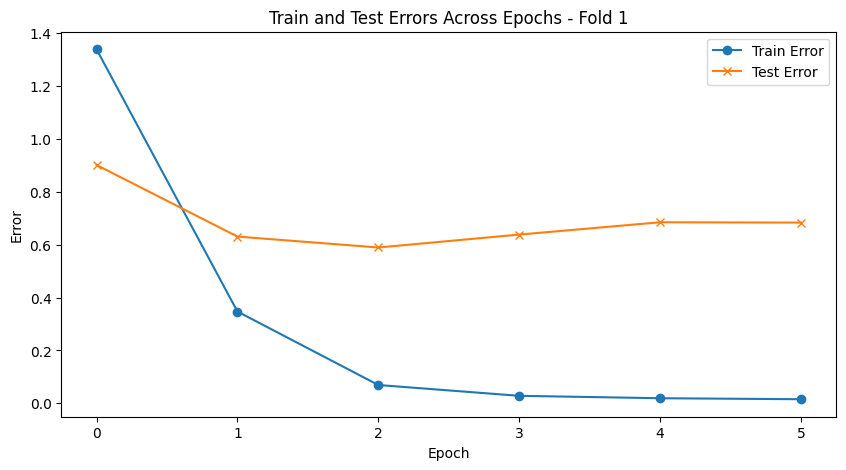

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report for fold 1:
               precision    recall  f1-score   support

       anger       0.88      0.72      0.79       450
        fear       0.71      0.82      0.76       389
         joy       0.86      0.87      0.87      1053
        love       0.69      0.70      0.69       261
     sadness       0.86      0.89      0.87       938
    surprise       0.79      0.50      0.61       109

    accuracy                           0.82      3200
   macro avg       0.80      0.75      0.77      3200
weighted avg       0.83      0.82      0.82      3200

Training fold 2...
Epoch 1/10


c:\Users\prisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.3662 - loss: 1.5439 - val_accuracy: 0.7147 - val_loss: 0.8274
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8634 - loss: 0.4422 - val_accuracy: 0.8100 - val_loss: 0.5681
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9815 - loss: 0.0735 - val_accuracy: 0.8253 - val_loss: 0.5686
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9943 - loss: 0.0267 - val_accuracy: 0.8241 - val_loss: 0.5869
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9972 - loss: 0.0131 - val_accuracy: 0.8238 - val_loss: 0.6278


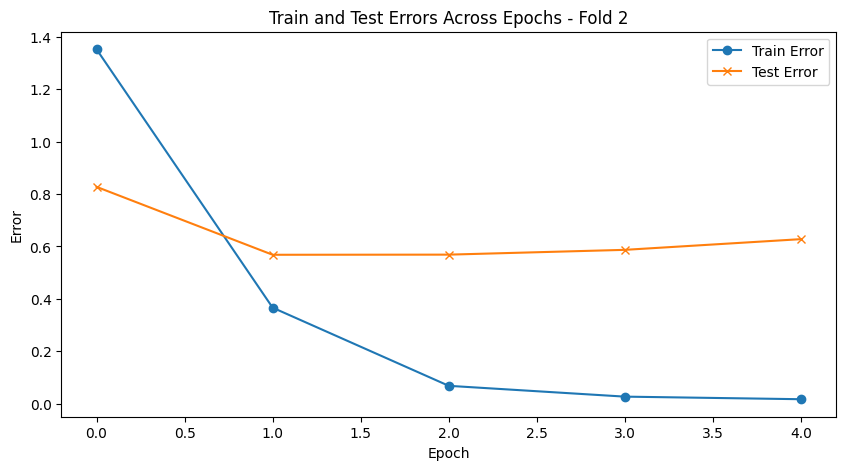

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report for fold 2:
               precision    recall  f1-score   support

       anger       0.86      0.65      0.74       404
        fear       0.78      0.71      0.74       380
         joy       0.82      0.91      0.86      1110
        love       0.83      0.55      0.66       283
     sadness       0.79      0.93      0.86       917
    surprise       0.82      0.43      0.57       106

    accuracy                           0.81      3200
   macro avg       0.82      0.70      0.74      3200
weighted avg       0.81      0.81      0.80      3200

Training fold 3...
Epoch 1/10


c:\Users\prisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.3679 - loss: 1.5275 - val_accuracy: 0.7334 - val_loss: 0.8049
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8849 - loss: 0.3814 - val_accuracy: 0.8091 - val_loss: 0.5665
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9891 - loss: 0.0484 - val_accuracy: 0.8231 - val_loss: 0.5665
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9946 - loss: 0.0222 - val_accuracy: 0.8141 - val_loss: 0.6257
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9978 - loss: 0.0132 - val_accuracy: 0.8134 - val_loss: 0.6658


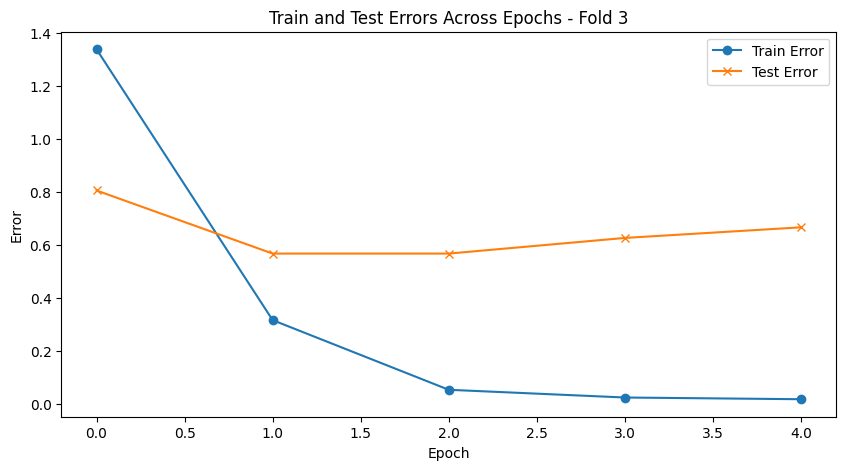

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report for fold 3:
               precision    recall  f1-score   support

       anger       0.79      0.79      0.79       432
        fear       0.77      0.72      0.74       392
         joy       0.86      0.84      0.85      1076
        love       0.63      0.67      0.65       252
     sadness       0.82      0.92      0.87       917
    surprise       0.80      0.34      0.48       131

    accuracy                           0.81      3200
   macro avg       0.78      0.71      0.73      3200
weighted avg       0.81      0.81      0.80      3200

Training fold 4...
Epoch 1/10


c:\Users\prisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.3753 - loss: 1.5293 - val_accuracy: 0.6766 - val_loss: 0.9101
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8317 - loss: 0.5419 - val_accuracy: 0.8138 - val_loss: 0.5417
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9726 - loss: 0.1112 - val_accuracy: 0.8172 - val_loss: 0.6007
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9913 - loss: 0.0359 - val_accuracy: 0.8222 - val_loss: 0.6381
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9961 - loss: 0.0188 - val_accuracy: 0.8112 - val_loss: 0.7038


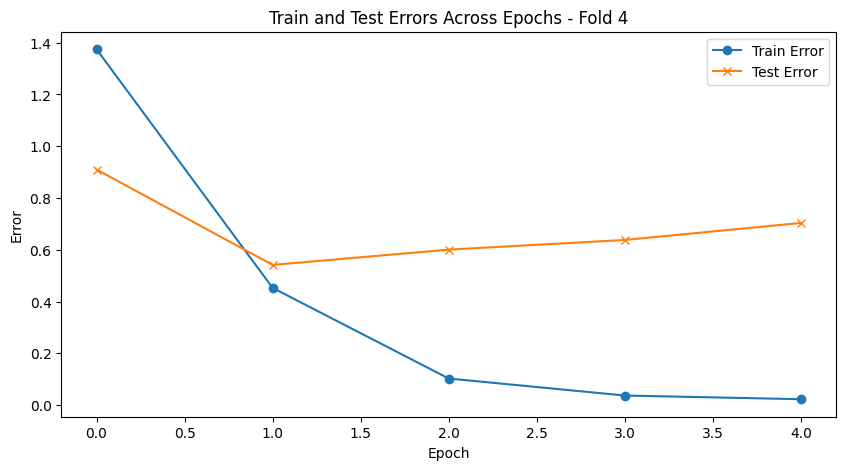

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification report for fold 4:
               precision    recall  f1-score   support

       anger       0.75      0.78      0.76       432
        fear       0.73      0.75      0.74       406
         joy       0.87      0.88      0.87      1071
        love       0.63      0.73      0.68       250
     sadness       0.88      0.87      0.87       916
    surprise       0.76      0.38      0.50       125

    accuracy                           0.81      3200
   macro avg       0.77      0.73      0.74      3200
weighted avg       0.82      0.81      0.81      3200

Training fold 5...
Epoch 1/10


c:\Users\prisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.3826 - loss: 1.5336 - val_accuracy: 0.7074 - val_loss: 0.8955
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.8552 - loss: 0.4660 - val_accuracy: 0.8074 - val_loss: 0.5817
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9814 - loss: 0.0716 - val_accuracy: 0.8153 - val_loss: 0.6331
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9954 - loss: 0.0261 - val_accuracy: 0.8209 - val_loss: 0.6688
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9978 - loss: 0.0147 - val_accuracy: 0.8124 - val_loss: 0.7189


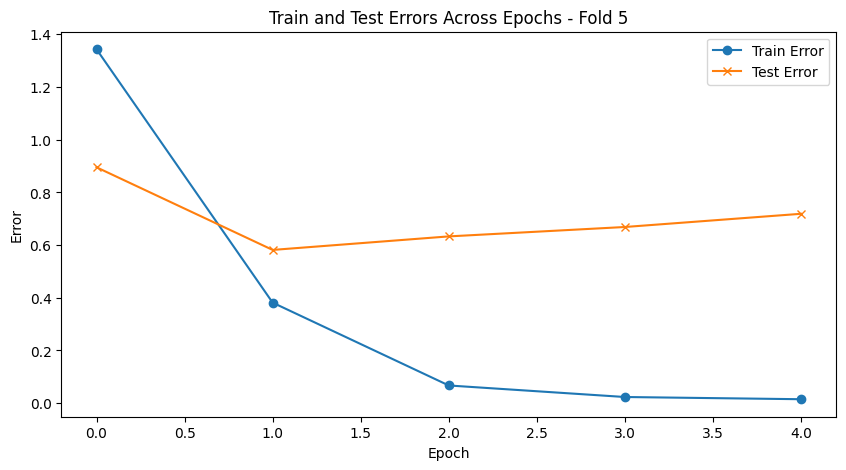

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification report for fold 5:
               precision    recall  f1-score   support

       anger       0.78      0.77      0.78       441
        fear       0.80      0.67      0.73       370
         joy       0.82      0.88      0.85      1052
        love       0.68      0.66      0.67       258
     sadness       0.85      0.87      0.86       977
    surprise       0.66      0.51      0.58       101

    accuracy                           0.81      3199
   macro avg       0.77      0.73      0.74      3199
weighted avg       0.81      0.81      0.81      3199



In [12]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1

for train_index, test_index in kf.split(padded_sequences):
    xtrain, xtest = padded_sequences[train_index], padded_sequences[test_index]
    ytrain, ytest = one_hot_labels[train_index], one_hot_labels[test_index]
    
    model = create_model()
    print(f"Training fold {fold_no}...")
    
    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), callbacks=[early_stopping])
    
    # Plot the train and test errors for each epoch for the current fold
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], marker='o', label='Train Error')
    plt.plot(history.history['val_loss'], marker='x', label='Test Error')
    plt.title(f'Train and Test Errors Across Epochs - Fold {fold_no}')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    # Predictions
    y_pred = model.predict(xtest)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(ytest, axis=1)
    
    # Calculate metrics
    report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
    print(f"Classification report for fold {fold_no}:\n", report)
    
    fold_no += 1

In [13]:
# #input_text from user
# input_text = input("Please input sentence here : ")

# # Preprocess the input text
# input_sequence = tokenizer.texts_to_sequences([input_text])
# padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
# prediction = model.predict(padded_input_sequence)
# predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
# print(predicted_label)